### Author: Minji Park
### Date: 05/05/2022

# **Import and Install Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter

In [2]:
!pip install nltk
import nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.4.24-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (763 kB)


# **Data Load**

In [3]:
data = pd.read_csv('data/chocolate.csv')

In [4]:
data

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75
...,...,...,...,...,...,...,...,...,...,...
1555,336,Bonnat,France,2009,Peru,"Porcelana, Apotequil",75%,"3- B,S,C","flat, bread, earthy",2.75
1556,331,Bonnat,France,2009,Ivory Coast,Ivory Coast,75%,"3- B,S,C","oily, intense cocoa, sl. Burnt",3.00
1557,336,Bonnat,France,2009,Mexico,"Porcelana, Tabasco, Marfil de Blanco",75%,"3- B,S,C","mild bitter, nut, possible mold",3.00
1558,395,Bonnat,France,2009,Mexico,"Xoconusco, cacao Real",75%,"3- B,S,C","fatty, roasty, earthy",3.00


# **Bar Plot for 5 Most frequent words in Most Memorable Characteristics by review interval**

Only the data in review sections 1-2 and 4-5 are filtered to extract the words that appear the most in Most Memorable Features. Through this, it is possible to know the most responsive feature and bad feature in general.

* Make rating range

In [5]:
def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 1):
        value = '0-1'
    elif (x>= 1 and x < 2):
        value = '1-2'
    elif (x>= 2 and x < 3):
        value = '2-3'
    elif (x>= 3 and x < 4):
        value = '3-4'
    elif (x >= 4 and x  < 5):
        value = '4-5'
    return value
data['Rating_ranges'] = data['Rating'].apply(rangeScore)

* Filter the data

In [6]:
data12 = data[data['Rating_ranges'] == '1-2']['Most Memorable Characteristics']
data45 = data[data['Rating_ranges'] == '4-5']['Most Memorable Characteristics']
data45

46              smooth, wild berries
96        oily, dried fruit, leather
123                         cardamon
146     creamy,sticky, peanut butter
196          balanced, cherry, choco
                    ...             
1504      rich cocoa, spicy, cinamon
1514            creamy, nutty, cocoa
1550           creamy, fatty, floral
1551           creamy, coconut, tang
1554       creamy, strawberry, nutty
Name: Most Memorable Characteristics, Length: 68, dtype: object

In [7]:
data12.to_csv('data/data12.csv')
data45.to_csv('data/data45.csv')

### **Review rating: 1-2 analysis**


In [8]:
with open(r'data/data12.csv','r',encoding='cp949') as f:
    text12=f.readlines()
text12

[',Most Memorable Characteristics\n',
 '2,"pastey, bitter, unfixable"\n',
 '21,"vanilla, strong chemical"\n',
 '27,"very nutty, very bitter"\n',
 '39,"sticky, intense, very bitter"\n',
 '59,"acidic, bitter, dry"\n',
 '60,"cardboard, very bitter, floral"\n',
 '66,"bitter, cocoa"\n',
 '73,"chalky, musty, very bitter"\n',
 '79,high intensity bitter\n',
 '80,this is not chocolate\n',
 '1098,"cocoa, dominate off note"\n',
 '1315,"perfume, strong chemical"\n']

In [9]:
text_strip12=list([i.strip() for i in text12 if i !='\n'])
text_join12 =' '.join(text_strip12)
text_join12

',Most Memorable Characteristics 2,"pastey, bitter, unfixable" 21,"vanilla, strong chemical" 27,"very nutty, very bitter" 39,"sticky, intense, very bitter" 59,"acidic, bitter, dry" 60,"cardboard, very bitter, floral" 66,"bitter, cocoa" 73,"chalky, musty, very bitter" 79,high intensity bitter 80,this is not chocolate 1098,"cocoa, dominate off note" 1315,"perfume, strong chemical"'

In [10]:
filtered_content12=re.sub(r'[^\w]',' ', text_join12)
filtered_content12

' Most Memorable Characteristics 2  pastey  bitter  unfixable  21  vanilla  strong chemical  27  very nutty  very bitter  39  sticky  intense  very bitter  59  acidic  bitter  dry  60  cardboard  very bitter  floral  66  bitter  cocoa  73  chalky  musty  very bitter  79 high intensity bitter 80 this is not chocolate 1098  cocoa  dominate off note  1315  perfume  strong chemical '

In [11]:
text12 = nltk.word_tokenize(filtered_content12)
text12

['Most',
 'Memorable',
 'Characteristics',
 '2',
 'pastey',
 'bitter',
 'unfixable',
 '21',
 'vanilla',
 'strong',
 'chemical',
 '27',
 'very',
 'nutty',
 'very',
 'bitter',
 '39',
 'sticky',
 'intense',
 'very',
 'bitter',
 '59',
 'acidic',
 'bitter',
 'dry',
 '60',
 'cardboard',
 'very',
 'bitter',
 'floral',
 '66',
 'bitter',
 'cocoa',
 '73',
 'chalky',
 'musty',
 'very',
 'bitter',
 '79',
 'high',
 'intensity',
 'bitter',
 '80',
 'this',
 'is',
 'not',
 'chocolate',
 '1098',
 'cocoa',
 'dominate',
 'off',
 'note',
 '1315',
 'perfume',
 'strong',
 'chemical']

In [12]:
from collections import Counter
c12= Counter(text12)
print(c12.most_common(30))

[('bitter', 8), ('very', 5), ('strong', 2), ('chemical', 2), ('cocoa', 2), ('Most', 1), ('Memorable', 1), ('Characteristics', 1), ('2', 1), ('pastey', 1), ('unfixable', 1), ('21', 1), ('vanilla', 1), ('27', 1), ('nutty', 1), ('39', 1), ('sticky', 1), ('intense', 1), ('59', 1), ('acidic', 1), ('dry', 1), ('60', 1), ('cardboard', 1), ('floral', 1), ('66', 1), ('73', 1), ('chalky', 1), ('musty', 1), ('79', 1), ('high', 1)]


### **Review rating: 4-5 analysis**

In [13]:
with open(r'data/data45.csv','r',encoding='cp949') as f:
    text45=f.readlines()

In [14]:
text_strip45=list([i.strip() for i in text45 if i !='\n'])
text_join45=' '.join(text_strip45)

In [15]:
filtered_content45=re.sub(r'[^\w]',' ', text_join45)

In [16]:
text45 = nltk.word_tokenize(filtered_content45)
c45 = Counter(text45)
print(c45.most_common(30))

[('creamy', 26), ('cocoa', 18), ('nutty', 11), ('fruit', 8), ('berry', 6), ('sticky', 5), ('peanut', 5), ('balanced', 5), ('honey', 5), ('complex', 4), ('tart', 4), ('coffee', 4), ('and', 4), ('floral', 4), ('nuts', 4), ('red', 4), ('smooth', 3), ('dried', 3), ('cherry', 3), ('long', 3), ('banana', 3), ('grapes', 3), ('smoke', 3), ('mild', 3), ('strawberry', 3), ('cinamon', 3), ('butter', 2), ('choco', 2), ('marshmallow', 2), ('dark', 2)]


Through the plot, it can be seen that 'bitter' and 'very' are the most common in features with a review score of 1-2, and 'creamy', 'cocoa', and 'nutty' are the most common in features with a review score of 4-5. 

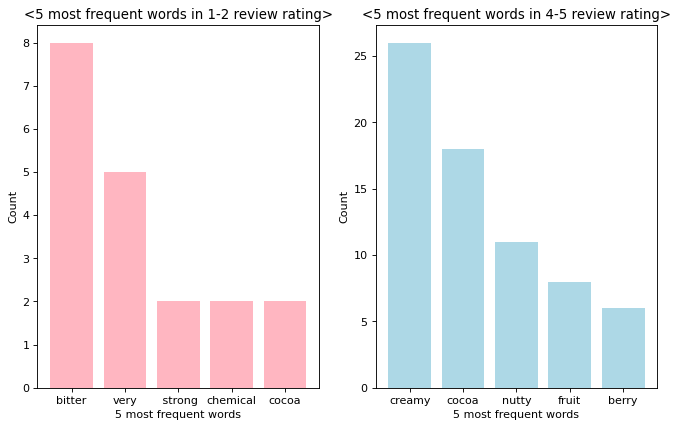

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
x12 = ['bitter', 'very',' strong', 'chemical', 'cocoa']
y12 = [8, 5, 2, 2, 2]
x45 = ['creamy', 'cocoa','nutty','fruit','berry']
y45 = [26, 18, 11, 8, 6]
plt.subplot(1, 2, 1)
plt.bar(x12, y12, color = 'lightpink')
plt.xlabel('5 most frequent words')
plt.ylabel('Count')
plt.title('<5 most frequent words in 1-2 review rating>')
plt.subplot(1, 2, 2)
plt.bar(x45, y45, color = 'lightblue')
plt.xlabel('5 most frequent words')
plt.ylabel('Count')
plt.title('<5 most frequent words in 4-5 review rating>')
plt.savefig('figures/five most freqeunt words in 1-2 & 4-5 review rating.png')

# **Box plot for Cocoa percent by review interval**

Draw a box plot to find out the relationship between Cocoa Percent feature and review score.

In [18]:
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace(r"[^\d]", '').astype(int)

/tmp/ipykernel_277/2372766414.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cocoa Percent'] = data['Cocoa Percent'].str.replace(r"[^\d]", '').astype(int)


In [19]:
data12 = data[data['Rating_ranges'] == '1-2']['Cocoa Percent']
data23 = data[data['Rating_ranges'] == '2-3']['Cocoa Percent']
data34 = data[data['Rating_ranges'] == '3-4']['Cocoa Percent']
data45 = data[data['Rating_ranges'] == '4-5']['Cocoa Percent']

In [20]:
plotdata = [data12, data23, data34, data45]

Overall, it can be seen that the higher the review score, the lower the cocoa percent. In particular, in the 1-2 section of the review score, the cocoa percent was often 100. Also it can be seen that the higher the score, the lower the median and the number of outliers decreased.

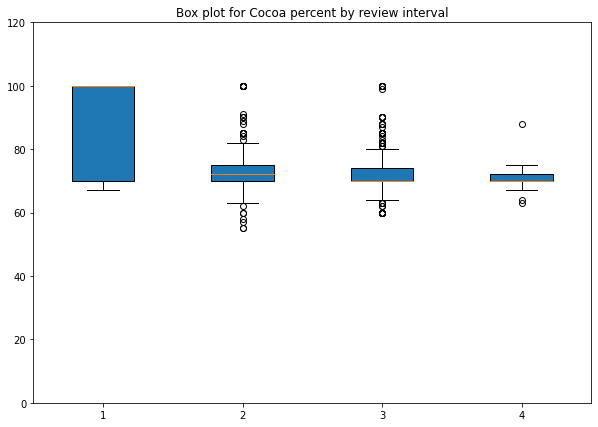

In [45]:
plt.figure(figsize =(10, 7))
#plt.add_axes([0,0,1,1])
plt.boxplot(plotdata, patch_artist=True)
plt.ylim((0,120))
#colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
#for patch, color in zip(box['boxes'], colors):
#    patch.set_facecolor(color)
# plt.xticks([1,2,3,4], label = ['1-2','2-3','3-4','4-5'])
plt.title('Box plot for Cocoa percent by review interval')
plt.savefig('figures/Box plot for Cocoa Percent by review interval.png')

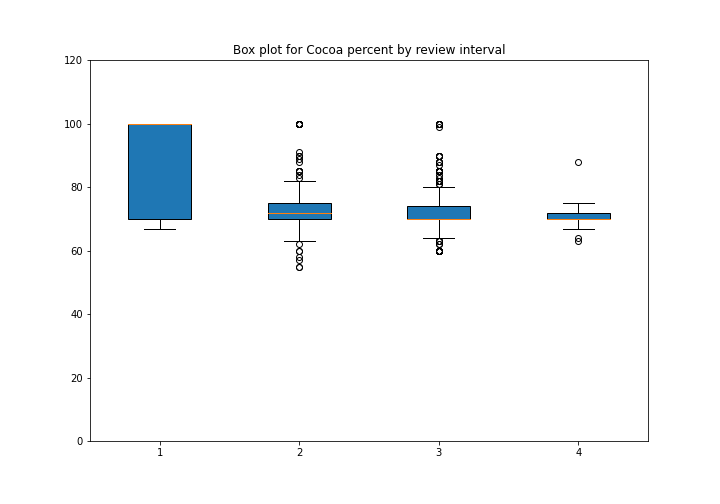

In [44]:
from IPython.display import Image
Image('figures/Box plot for Cocoa Percent by review interval.png')